In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

c:\Users\miura\.pyenv\pyenv-win\versions\3.9.6\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# DataLoaderでバッチ化
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

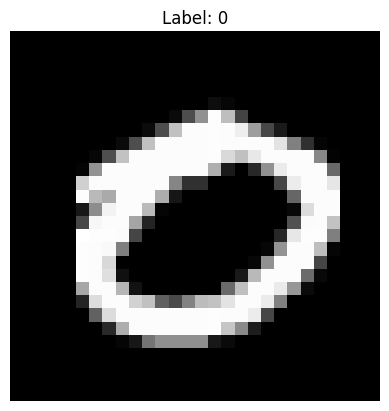

In [3]:
import matplotlib.pyplot as plt

images, labels = next(iter(train_loader))

plt.imshow(images[0][0].numpy(), cmap='gray')
plt.title(f"Label: {labels[0].item()}")
plt.axis('off')
plt.show()

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.drop = nn.Dropout(0.5)
        self.fc = nn.Linear(32*7*7, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.drop(x)
        x = self.fc(x)
        return x


In [ ]:
model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
losses = []

epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")
    losses.append(running_loss / len(train_loader))

Epoch 1, Loss: 0.2701
Epoch 2, Loss: 0.1025
Epoch 3, Loss: 0.0817
Epoch 4, Loss: 0.0715


In [6]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 99.24%


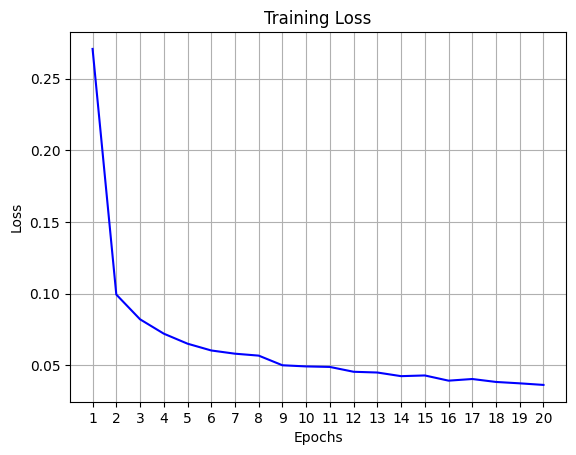

In [7]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs + 1), losses, color = 'blue')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, epochs + 1))
plt.grid()
plt.show()

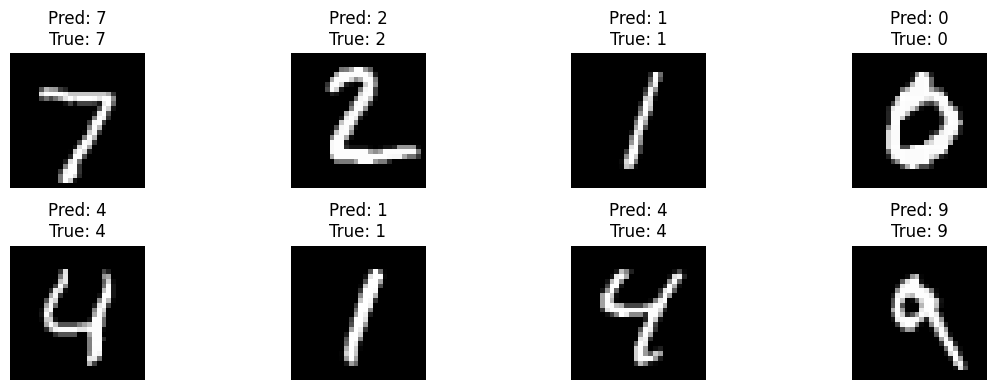

In [9]:
images, labels = next(iter(test_loader))

model.eval()
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

plt.figure(figsize=(12, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i][0].cpu().numpy(), cmap='gray')
    plt.title(f"Pred: {predicted[i].item()}\nTrue: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()